#Import Necessary Library and Model

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report)

from sklearn.svm import SVC


#Load Data from UCI

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, header=None, na_values='?')  # Handle missing values as NaN
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#Column Description

Column Name,Description

age,Age in years.

sex,Sex (1 = male; 0 = female).

cp,Chest pain type: Value 1 = typical angina; Value 2 = atypical angina; Value 3 = non-anginal pain; Value 4 = asymptomatic.

trestbps,Resting blood pressure (in mm Hg on admission to the hospital).
chol,Serum cholesterol in mg/dl.

fbs,Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg,Resting electrocardiographic results: Value 0 = normal; Value 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); Value 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria.

thalach,Maximum heart rate achieved.

exang,Exercise induced angina (1 = yes; 0 = no).

oldpeak,ST depression induced by exercise relative to rest.

slope,The slope of the peak exercise ST segment: Value 1 = upsloping; Value 2 = flat; Value 3 = downsloping.

ca,Number of major vessels (0-3) colored by fluoroscopy.

thal,Thalassemia indicator: 3 = normal; 6 = fixed defect; 7 = reversible defect.

target (or num),Diagnosis of heart disease (angiographic disease status): Value 0 = < 50% diameter narrowing; Value 1-4 = > 50% diameter narrowing (in any major vessel; often binarized to 0/1 for presence/absence of disease in models).

In [16]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


#Drops Row that Contain NaN Value

In [17]:
df = df.dropna()#Drops any rows that contain at least one NaN (Not a Number) value
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


#Separate Features and Target

In [18]:
X = df.drop('target', axis=1)
y = (df['target'] > 0).astype(int)  # Binary target
X.head(5)
y.head(5)

,target
0,0
1,1
2,1
3,0
4,0


# Split data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Performance Evaluation

In [34]:
# Predictions
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

cm = confusion_matrix(y_test, y_pred)

print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  CV Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"  Confusion Matrix: {cm}")

  Accuracy:  0.9000
  Precision: 0.8750
  Recall:    0.8750
  F1-Score:  0.8750
  CV Score:  0.8143 (+/- 0.0341)
  Confusion Matrix: [[33  3]
 [ 3 21]]



Visualization saved as 'heart_disease_analysis.png'


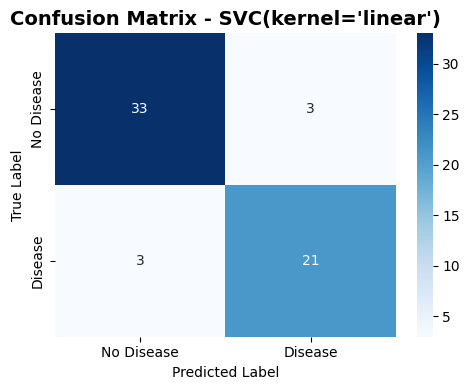

In [59]:

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Disease', 'Disease'],
           yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {model}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('heart_disease_analysis.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'heart_disease_analysis.png'")
plt.show()



#Sve The Trained Pipeline

In [54]:
import pickle

pickle_model_path = "heart_disease_svm_model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(model, f)